<a href="https://colab.research.google.com/github/mannmoshe/mario-game/blob/main/mario_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mario Game <br>
## By Ido Nissimian & Moshe Mann

In [1]:
import numpy as np

In [2]:
# Players: M = Mario, B = Bowser 
# The goal is to reach to the Q = Queen
# Optional moves: u = up, r = right, l = left
# q1 -> Mario wins
# q2 -> Bowser wins
# c = fight champion's reward
c = .5

class MarioGame:
  
  def __init__(self):
    self.state = np.array([['M', 2, 'B'], [4, 'Q', 6]])
    self.payoff = (0, 0)
  
  def uu(self):
    p = np.random.choice(np.arange(1, 5), p=[2/9, 4/9, 1/9, 2/9])
    if p == 1:
      pass
    elif p == 2:
      self.state = np.array([[1, 2, 'B'], ['M', 'Q', 6]])

    elif p == 3:
      self.state = np.array([['M', 2, 3], [4, 'Q', 'B']])

    elif p == 4:
      self.state = np.array([[1, 2, 3], ['M', 'Q', 'B']])

  def rl(self):       
    p = np.random.choice(np.arange(1, 3), p=[3/5, 2/5])
    if p == 1:
      self.state = np.array([['M', 'B', 3], [4, 'Q', 6]])
      self.payoff = (-c, c) 
    elif p == 2:
      self.state = np.array([[1, 'M', 'B'], [4, 'Q', 6]])
      self.payoff = (c, -c)

  def ul(self):
    p = np.random.choice(np.arange(1, 3), p=[1/3, 2/3])
    if p == 1:
      self.state = np.array([['M', 'B', 3], [4, 'Q', 6]])
    elif p == 2:
      self.state = np.array([[1, 'B', 3], ['M', 'Q', 6]])

  def ru(self):
    p = np.random.choice(np.arange(1, 3), p=[2/3, 1/3])
    if p == 1:
      self.state = np.array([[1, 'M', 'B'], [4, 'Q', 6]])
    elif p == 2:
      self.state = np.array([[1, 'M', 3], [4, 'Q', 'B']])

  def next_step(self):
    if (self.state == np.array([[1, 2, 3], ['M', 'Q', 'B']])).all():
      p = np.random.choice(np.arange(1, 3), p=[3/5, 2/5])
      if p == 1:
        self.state = 'q2'
        self.payoff = (-1-c, 1+c)
      elif p == 2:
        self.state = 'q1'
        self.payoff = (1+c, -1-c)
    
    elif (self.state == np.array([[1, 'B', 3], ['M', 'Q', 6]])).all():
      p = np.random.choice(np.arange(1, 3), p=[1/4, 3/4]) 
      if p == 1:
        self.state = 'q2'
        self.payoff = (-1, 1)
      elif p == 2:
        self.state = 'q1'
        self.payoff = (1, -1) 

    elif (self.state == np.array([[1, 'M', 3], [4, 'Q', 'B']])).all():
      p = np.random.choice(np.arange(1, 3), p=[3/4, 1/4])
      if p == 1:
        self.state = 'q2'
        self.payoff = (-1, 1)
      elif p == 2:
        self.state = 'q1'
        self.payoff = (1, -1)

    elif (self.state == np.array([['M', 'B', 3], [4, 'Q', 6]])).all() | (self.state == np.array([['M', 2, 3], [4, 'Q', 'B']])).all():
      self.state = 'q2'
      self.payoff = (-1, 1)

    elif (self.state == np.array([[1, 'M', 'B'], [4, 'Q', 6]])).all() | (self.state == np.array([[1, 2, 'B'], ['M', 'Q', 6]])).all():
      self.state = 'q1'
      self.payoff = (1, -1)

    pass

  def print_state(self):
    if 'q1' in self.state or 'q2' in self.state:
      print(self.state)
    else:
      arr = self.state[::-1]
      for x in arr:
          print('||', x[0], '||', x[1], '||', x[2], '||')



In Markov pure strategy the nash equalibrium is: up left (ul)

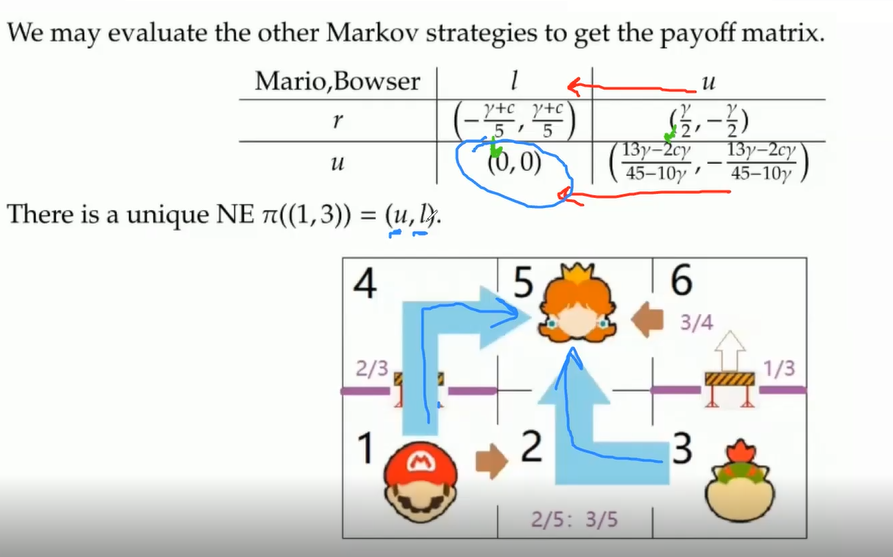

In [3]:
g = MarioGame()

In [4]:
g.ul()

In [5]:
g.print_state()

|| 4 || Q || 6 ||
|| M || B || 3 ||


In [6]:
g.payoff

(0, 0)

In [7]:
g.next_step()

In [8]:
g.print_state()

q2


In [9]:
g.payoff

(-1, 1)

Another strategy, learning from history:

In [17]:
uu_results = []
rl_results = []
ul_results = []
ru_results = []

Play 100 games each option:

In [18]:
for i in range(100):
  g = MarioGame()
  g.uu()
  g.next_step()
  if isinstance(g.state, str):
    if g.state == 'q1':
      uu_results.append(1)
    elif g.state == 'q2':
      uu_results.append(0)
  else: 
    uu_results.append(.5)

In [20]:
uu_results[:10]

[0, 0, 1, 1, 0.5, 0.5, 0, 0, 0.5, 1]

In [21]:
for i in range(100):
  g = MarioGame()
  g.rl()
  g.next_step()
  if g.state == 'q1':
    rl_results.append(1)
  elif g.state == 'q2':
    rl_results.append(0)

In [23]:
rl_results[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

In [24]:
for i in range(100):
  g = MarioGame()
  g.ul()
  g.next_step()
  if g.state == 'q1':
    ul_results.append(1)
  elif g.state == 'q2':
    ul_results.append(0)

In [25]:
ul_results[:10]

[1, 1, 1, 1, 0, 0, 1, 1, 0, 1]

In [26]:
for i in range(100):
  g = MarioGame()
  g.ru()
  g.next_step()
  if g.state == 'q1':
    ru_results.append(1)
  elif g.state == 'q2':
    ru_results.append(0)

In [27]:
ru_results[:10]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

Calculate mean of each option:

In [28]:
mario_1_step_u_results = uu_results + ul_results

In [29]:
mean_res_1_step_u = sum(mario_1_step_u_results) / len(mario_1_step_u_results)
mean_res_1_step_u

0.59

In [30]:
mario_1_step_r_results = rl_results + ru_results

In [31]:
mean_res_1_step_r = sum(mario_1_step_r_results) / len(mario_1_step_r_results)
mean_res_1_step_r

0.58

mean_res_1_step_u > mean_res_1_step_r<br>
So mario will play up

In [32]:
bowser_2_step_u_results = uu_results

In [34]:
mean_res_2_step_u = 1-(sum(bowser_2_step_u_results) / len(bowser_2_step_u_results))
mean_res_2_step_u

0.36

In [35]:
bowser_2_step_l_results = ul_results

In [36]:
mean_res_2_step_l = 1-(sum(bowser_2_step_l_results) / len(bowser_2_step_l_results))
mean_res_2_step_l

0.45999999999999996

mean_res_2_step_l > mean_res_2_step_l<br>
So bowser will play left<br>

I learning from history strategy the game is up-left.